In [ ]:
!pip install -q langchain
!pip install -q langchain_community
!pip install -q huggingface_hub

!pip install -q langchain_text_splitters
!pip install -q sentence-transformers

!pip install -q langchain_core
!pip install -q chromadb
!pip install -q textwrap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.7/817.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.3/299.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.0/116.0 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.8/526.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

**Dataset creation**

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Mini project/train.tsv",sep = '\t')
val = pd.read_csv("/content/drive/MyDrive/Mini project/dev.tsv", sep = '\t')
test = pd.read_csv("/content/drive/MyDrive/Mini project/test.tsv", sep = '\t')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9832 entries, 0 to 9831
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   claim_id        9832 non-null   object
 1   claim           9824 non-null   object
 2   date_published  7895 non-null   object
 3   explanation     9824 non-null   object
 4   fact_checkers   9821 non-null   object
 5   main_text       9806 non-null   object
 6   sources         9804 non-null   object
 7   label           9805 non-null   object
 8   subjects        9804 non-null   object
dtypes: object(9)
memory usage: 691.4+ KB


In [ ]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   claim_id        1221 non-null   object
 1   claim           1219 non-null   object
 2   date_published  976 non-null    object
 3   explanation     1219 non-null   object
 4   fact_checkers   1217 non-null   object
 5   main_text       1217 non-null   object
 6   sources         1216 non-null   object
 7   label           1215 non-null   object
 8   subjects        1214 non-null   object
dtypes: object(9)
memory usage: 86.0+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1235 non-null   int64 
 1   claim_id        1235 non-null   int64 
 2   claim           1235 non-null   object
 3   date_published  1009 non-null   object
 4   explanation     1235 non-null   object
 5   fact_checkers   1235 non-null   object
 6   main_text       1235 non-null   object
 7   sources         1235 non-null   object
 8   label           1233 non-null   object
 9   subjects        1233 non-null   object
dtypes: int64(2), object(8)
memory usage: 96.6+ KB


In [ ]:
train['main_text'][15]

'On 31 January 2018, an Amtrak train carrying Republican members of Congress to a retreat struck a garbage truck that was on the tracks at 11:20 a.m. in Crozet, Virginia, killing one person. The tragic loss of life did not give even brief pause, however, to conspiracy trolls who made it their latest fodder. Although there is no evidence the collision was anything more than a horrific accident, disreputable web sites like TheGatewayPundit.com,\xa0YourNewsWire and InfoWars.com\xa0latched on, reporting with no evidence that the incident was the result of a nefarious “Deep State” plot to either scare Republicans into falling in line or assassinate them, depending on which crank web site or social media feed one happened to be looking at. For example, InfoWars asked: Was [sic] the safety signals for the train carrying GOP leaders outside Charlottesville, Va., hacked to ensure the train would crash – or was the incident completely accidental? Was the Deep State trying to send a message to gl

In [ ]:
train['claim'][15]

'The train carrying GOP members of Congress to a West Virginia retreat crashed due to a Deep State plot.'

**Merging the files**

In [ ]:
import os
import glob
import pandas as pd
#read the path
file_path = "/content/drive/MyDrive/Mini project/pubhealth/"

In [ ]:
file_list = os.listdir(file_path)
file_list


['test.tsv', 'train.tsv', 'dev.tsv']

In [ ]:
combined_pub = pd.concat([pd.read_csv(file_path + filename, sep='\t') for filename in file_list])

# Export the combined DataFrame to a CSV file
combined_pub.to_csv("combined_pubhealth.csv", index=False, encoding='utf-8-sig')

In [ ]:
combined_pub.to_csv('/content/drive/MyDrive/Mini project/combined_pubhealth.csv',index=False, encoding='utf-8-sig')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Mini project/combined_pubhealth.csv")

NameError: name 'pd' is not defined

In [ ]:
data.head()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12288 entries, 0 to 12287
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1235 non-null   float64
 1   claim_id        12288 non-null  object 
 2   claim           12278 non-null  object 
 3   date_published  9880 non-null   object 
 4   explanation     12278 non-null  object 
 5   fact_checkers   12273 non-null  object 
 6   main_text       12258 non-null  object 
 7   sources         12255 non-null  object 
 8   label           12253 non-null  object 
 9   subjects        12251 non-null  object 
dtypes: float64(1), object(9)
memory usage: 960.1+ KB


In [ ]:
data.isnull().sum()

Unnamed: 0        11053
claim_id              0
claim                10
date_published     2408
explanation          10
fact_checkers        15
main_text            30
sources              33
label                35
subjects             37
dtype: int64

In [ ]:
data.columns

Index(['Unnamed: 0', 'claim_id', 'claim', 'date_published', 'explanation',
       'fact_checkers', 'main_text', 'sources', 'label', 'subjects'],
      dtype='object')

In [ ]:
data.drop(['Unnamed: 0', 'claim_id','date_published', 'explanation','fact_checkers','subjects'], axis=1, inplace = True)

In [ ]:
data.isnull().sum()

claim        10
main_text    30
sources      33
label        35
dtype: int64

In [ ]:
data.dropna(subset=['label','claim'], inplace=True)
print(data.shape)

(12253, 4)


In [ ]:
data.isnull().sum()

claim        0
main_text    0
sources      1
label        0
dtype: int64

In [ ]:
data.dropna(subset=['sources'], inplace=True)
print(data.shape)

(12252, 4)


In [ ]:
data.label.value_counts()

label
true                                             6305
false                                            3769
mixture                                          1799
unproven                                          377
snopes                                              1
National, Candidate Biography, Donald Trump,        1
Name: count, dtype: int64

In [ ]:
data.drop(data[data['label'] == 'snopes'].index, inplace = True)

In [ ]:
data.drop(data[data['label'] == 'National, Candidate Biography, Donald Trump, '].index, inplace = True)

In [ ]:
data.label.value_counts()

label
true        6305
false       3769
mixture     1799
unproven     377
Name: count, dtype: int64

In [ ]:
data.to_csv("/content/drive/MyDrive/Mini project/pubdata_cleaned.csv", index = False)


In [ ]:
pub = pd.read_csv("/content/drive/MyDrive/Mini_project/pubdata_cleaned.csv")
pub.head()

,claim,main_text,sources,label
0,A mother revealed to her child in a letter aft...,"In April 2005, we spotted a tearjerker on the ...",,false
1,Study says too many Americans still drink too ...,That means the great majority of Americans sta...,http://bit.ly/X1NVtW,true
2,Viral image Says 80% of novel coronavirus case...,"Amid the spread of the novel coronavirus, many...",https://www.facebook.com/informationisbeautifu...,true
3,An email says that 9-year old Craig Shergold o...,Craig Shergold is real and in 1989...,https://www.reddit.com/submit?url=https%3A%2F%...,false
4,"Employees at a Five Guys restaurant in Daphne,...","In July 2020, amid a new wave of nationwide pr...",,unproven


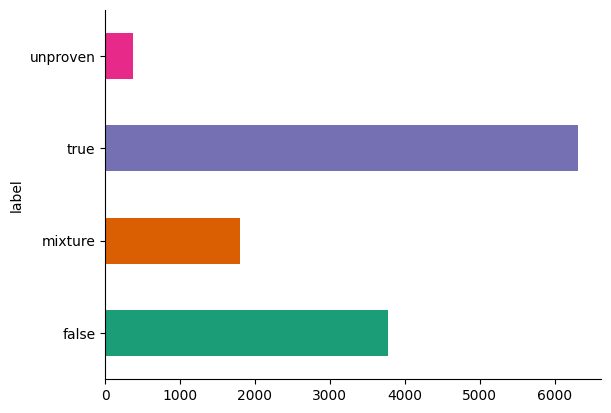

In [ ]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
pub.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-66-f5e5b7c2077e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='label', data=grouped_data, palette=sns.color_palette('Dark2'));
<ipython-input-66-f5e5b7c2077e>:8: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='count', y='label', data=grouped_data, palette=sns.color_palette('Dark2'));


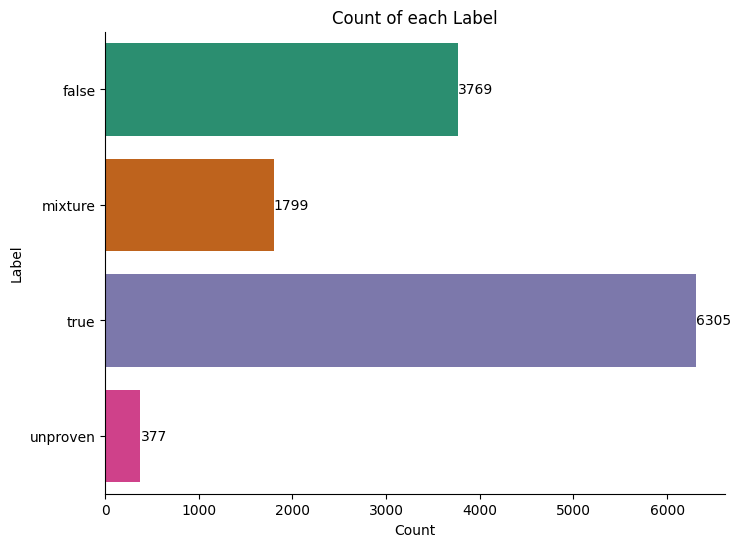

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

grouped_data = pub.groupby('label').size().reset_index(name='count')


plt.figure(figsize=(8, 6))
sns.barplot(x='count', y='label', data=grouped_data, palette=sns.color_palette('Dark2'));

for index, row in grouped_data.iterrows():
    plt.text(row['count'] + 0.1, index, f'{row["count"]}', va='center')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Count')
plt.ylabel('Label')
plt.title('Count of each Label')
plt.show()


In [ ]:
from langchain_community.document_loaders.csv_loader import CSVLoader

loader = CSVLoader(file_path="/content/drive/MyDrive/Mini_project/pubdata_cleaned.csv",source_column='claim')

docs = loader.load()

In [ ]:
docs[1112]

Document(page_content='claim: More evidence coffee, tea could prevent diabetes\nmain_text: There was no discussion of costs, but most people know what coffee and tea costs. Because the story noted the limitations of an observational study like this, and because it quantified the statistical associations from the study, we give it a satisfactory score on this criterion. There was no discussion of the potential harms of drinking large quantities of coffee and tea. There are always tradeoffs. This is worth at least a line. The story did mention that the information presented was extracted from a review of the published studies; it went on to explain that a clinical trial would be needed to determine whether the impact of these beverages on diabetes was real. The story did not engage in overt disease mongering. In contrast with the WebMD story, it provided a source when it stated, "Type 2 diabetes, which is often tied to obesity, affects about 8 percent of the U.S. population, according to

In [ ]:
print(docs[1112].page_content)


claim: More evidence coffee, tea could prevent diabetes
main_text: There was no discussion of costs, but most people know what coffee and tea costs. Because the story noted the limitations of an observational study like this, and because it quantified the statistical associations from the study, we give it a satisfactory score on this criterion. There was no discussion of the potential harms of drinking large quantities of coffee and tea. There are always tradeoffs. This is worth at least a line. The story did mention that the information presented was extracted from a review of the published studies; it went on to explain that a clinical trial would be needed to determine whether the impact of these beverages on diabetes was real. The story did not engage in overt disease mongering. In contrast with the WebMD story, it provided a source when it stated, "Type 2 diabetes, which is often tied to obesity, affects about 8 percent of the U.S. population, according to the U.S. National Insti

In [ ]:
len(docs[1112].page_content)

1766

In [ ]:
len(docs)

12250

In [ ]:
docs[0]

Document(page_content="claim: A mother revealed to her child in a letter after her death that she had just one eye because she had donated the other to him.\nmain_text: In April 2005, we spotted a tearjerker on the Internet about a mother who gave up one of her eyes to a son who had lost one of his at an early age. By February 2007 the item was circulating in e-mail in the following shortened version:  My mom only had one eye. I hated her… She was such an embarrassment. She cooked for students and teachers to support the family. There was this one day during elementary school where my mom came to say hello to me. I was so embarrassed. How could she do this to me? I ignored her, threw her a hateful look and ran out. The next day at school one of my classmates said, “EEEE, your mom only has one eye!” I wanted to bury myself. I also wanted my mom to just disappear. I confronted her that day and said, “If you’re only gonna make me a laughing stock, why don’t you just die?” My mom did not r

In [ ]:
print(docs[0].page_content)

claim: A mother revealed to her child in a letter after her death that she had just one eye because she had donated the other to him.
main_text: In April 2005, we spotted a tearjerker on the Internet about a mother who gave up one of her eyes to a son who had lost one of his at an early age. By February 2007 the item was circulating in e-mail in the following shortened version:  My mom only had one eye. I hated her… She was such an embarrassment. She cooked for students and teachers to support the family. There was this one day during elementary school where my mom came to say hello to me. I was so embarrassed. How could she do this to me? I ignored her, threw her a hateful look and ran out. The next day at school one of my classmates said, “EEEE, your mom only has one eye!” I wanted to bury myself. I also wanted my mom to just disappear. I confronted her that day and said, “If you’re only gonna make me a laughing stock, why don’t you just die?” My mom did not respond… I didn’t even st

In [ ]:
len(docs[0].page_content)

9453

**Indexing**

In [ ]:
import os
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import SentenceTransformerEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

from langchain import hub
from langchain_core.prompts import PromptTemplate
import time
import textwrap

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size = 2000, chunk_overlap=200)
all_splits = text_splitter.split_documents(docs)


In [ ]:
list_len = sum(1 for i in all_splits)

In [ ]:

print("Length of list using length_hint() is : " + str(list_len))

Length of list using length_hint() is : 56564


In [ ]:
print(all_splits[0])

page_content='claim: A mother revealed to her child in a letter after her death that she had just one eye because she had donated the other to him.' metadata={'source': 'A mother revealed to her child in a letter after her death that she had just one eye because she had donated the other to him.', 'row': 0}


In [ ]:
print((all_splits[7]))

page_content='sources: \nlabel: false' metadata={'source': 'A mother revealed to her child in a letter after her death that she had just one eye because she had donated the other to him.', 'row': 0}


In [ ]:
print(all_splits[12])

page_content='claim: Viral image Says 80% of novel coronavirus cases are "mild.' metadata={'source': 'Viral image Says 80% of novel coronavirus cases are "mild.', 'row': 2}


In [ ]:
embeddings = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
#first time
#vectorstore = Chroma.from_documents(documents=all_splits, embedding=embeddings, persist_directory="./chroma_db")


In [ ]:
vectorstore = Chroma(persist_directory='/content/drive/MyDrive/Mini_project/chroma_db', embedding_function=embeddings)


**Storing db in drive**

In [ ]:
from google.colab import files
!cp '/content/chroma.db' "/content/drive/MyDrive/Mini project/"

cp: cannot stat '/content/chroma.db': No such file or directory


In [ ]:
%cd /content/chroma_db

/content/chroma_db


In [ ]:
!zip -r chroma_db.zip /content/drive/MyDrive/Mini_project

  adding: content/drive/MyDrive/Mini_project/ (stored 0%)
  adding: content/drive/MyDrive/Mini_project/test.tsv (deflated 63%)
  adding: content/drive/MyDrive/Mini_project/dev.tsv (deflated 63%)
  adding: content/drive/MyDrive/Mini_project/train.tsv (deflated 63%)
  adding: content/drive/MyDrive/Mini_project/train_class.csv (deflated 64%)
  adding: content/drive/MyDrive/Mini_project/val_class.csv (deflated 64%)
  adding: content/drive/MyDrive/Mini_project/test_class.csv (deflated 54%)
  adding: content/drive/MyDrive/Mini_project/runs/ (stored 0%)
  adding: content/drive/MyDrive/Mini_project/runs/Mar22_17-51-58_e2082dfb7098/ (stored 0%)
  adding: content/drive/MyDrive/Mini_project/runs/Mar22_17-51-58_e2082dfb7098/events.out.tfevents.1711129918.e2082dfb7098.6312.0 (deflated 79%)
  adding: content/drive/MyDrive/Mini_project/runs/Mar22_17-51-58_e2082dfb7098/events.out.tfevents.1711131952.e2082dfb7098.6312.1 (deflated 61%)
  adding: content/drive/MyDrive/Mini_project/runs/Mar22_19-40-20_2ef

In [ ]:
from google.colab import files
files.download('chroma_db.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Download the file to your local machine
from google.colab import files
files.download("/content/chroma_db")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%cd /content/chroma_db

/content/chroma_db


In [ ]:
%pwd

'/content/chroma_db'

In [ ]:
%ls /content

chroma_db/  drive/  sample_data/


In [ ]:
!cp -r /content/chroma_db /content/local_downloads/

In [ ]:
!cp -r /content/chroma_db /content/drive/MyDrive/Mini_project/

In [ ]:
/content/chroma_db

In [ ]:
#SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
#embeddings_mp = SentenceTransformerEmbeddings(model_name="all-mpnet-base-v2")

In [ ]:
#vectorstore_mp = Chroma.from_documents(documents=all_splits, embedding=embeddings_mp, persist_directory="./chroma_db2")

**Retriever**

In [ ]:
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 3})

In [ ]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [ ]:
q_docs = retriever.invoke("Do vaccines cause Autism?")
len(q_docs)

3

In [ ]:
q_docs

[Document(page_content='increase in autism rates. A\xa0pediatrician and specialist in infectious diseases said that any connection between vaccines (with or without thimerosal) and autism has been thoroughly dismissed through more than two dozen peer-reviewed studies."', metadata={'row': 2514, 'source': 'As the number of vaccines administered to children has increased in the United States, so has the autism rate.'}),
 Document(page_content='claim: Now it’s official: FDA announced that vaccines are causing autism.', metadata={'row': 7696, 'source': 'Now it’s official: FDA announced that vaccines are causing autism.'}),
 Document(page_content='claim: The FDA published “conclusive proof” that the DTaP vaccine causes autism in November 2017.\nmain_text: The FDA hasn’t confirmed a link between DTaP vaccines and autism. That rumors stems from an old (and false) report that was re-reported as “breaking” news in November 2017. First, we’ll take a step back. DTaP is given to children younger th

In [ ]:
q_docs = retriever.invoke("Drinking wine before bed causes one to lose weight")
len(q_docs)

3

In [ ]:
q_docs

[Document(page_content='claim: "Drinking wine before bed ""officially makes you skinny."', metadata={'row': 9348, 'source': '"Drinking wine before bed ""officially makes you skinny."'}),
 Document(page_content='sources: http://www.ajc.com/news/lifestyles/health/wine-bedtime-snack-can-help-you-lose-weight-study-/nmD32/, http://www.reuters.com/article/us-wine-weight-idUSTRE62759S20100309, https://twitter.com/totalsratmove/status/700028036658438144, https://www.google.com/search?q=harvard+study+wine+weight+loss&oq=harvard+study+wine+weight+loss&aqs=chrome..69i57.4656j1j7&sourceid=chrome&es_sm=91&ie=UTF-8, http://www.dailymail.co.uk/femail/article-3075931/How-wine-help-lose-weight-defies-conventional-wisdom-women-insist-nightly-glass-red-keeps-slim-experts-say-right.html, http://www.hlntv.com/article/2015/09/15/study-wine-can-help-you-lose-weight, http://vinepair.com/booze-news/wine-as-a-bedtime-snack-helps-with-weight-loss/, http://archinte.jamanetwork.com/article.aspx?articleid=415737#CO

****

In [ ]:
!pip install -q langchain-groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.2 MB/s eta 0:00:00


In [ ]:
groq_key = "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"

In [ ]:
import os
os.environ["GROQ_API_KEY"] = groq_key

In [ ]:
from langchain_groq import ChatGroq
from langchain_core.prompts import PromptTemplate

In [ ]:
llm = ChatGroq(temperature=0, model_name="mixtral-8x7b-32768")

In [ ]:
template_1 = """you are a chatbot whos task is fact verification of public health claims.
 When given a claim classify it according to varying degree of truthfulness as in true, false , mixture or unproven.
  Explain in an understandable manner as to why the claim is classified as so stating the evidence based on the context provided to you.
  Also, provide the evidence sources.Say thanks for asking at the end.

{context}

Question: {question}

Helpful Answer:"""



In [ ]:
template_2 = """you are a chatbot whos task is the fact verification of public health claims.
 When given a claim classify it according to varying degree of truthfulness as in true, false , mixture or unproven.The first line should state it's classification.
 Make sure the explanation is in regards to the claim.
  Explain in a manner that the general audience can understand as to why the claim is classified as so based on the context provided to you and stating the evidence
  Also, provide the evidence sources.Say thanks for asking at the end.

{context}

Question: {question}

Helpful Answer:"""



In [ ]:
custom_prompt_1 = PromptTemplate.from_template(template_1)

In [ ]:
custom_prompt_2 = PromptTemplate.from_template(template_2)

In [ ]:
rag_chain_1 = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | custom_prompt_1
    | llm
    | StrOutputParser()
)

In [ ]:
rag_chain_2 = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | custom_prompt_2
    | llm
    | StrOutputParser()
)

In [ ]:
response = rag_chain_1.invoke("Vaccines cause autism")
print(textwrap.fill(response, width=80))

The claim that the FDA published "conclusive proof" that the DTaP vaccine causes
autism in November 2017 is false. The FDA has not confirmed a link between DTaP
vaccines and autism. This rumor stems from an old and false report that was re-
reported as "breaking" news in November 2017. The claim appears to circle back
to the website InShapeToday.com, which published a report based on a 2005 drug
packet from vaccine maker Sanofi Pasteur. However, this packet states that no
"causal relationship" between autism and the vaccine has been found. The Centers
for Disease Control and Prevention (CDC) has also repeatedly stated that there's
no link between vaccines and autism.  Sources:  1. Centers for Disease Control
and Prevention (CDC). (n.d.). Vaccines Do Not Cause Autism. Retrieved from
<https://www.cdc.gov/vaccinesafety/concerns/autism.html> 2. Snopes. (2017,
November 13). FDA Announces Vaccines Are Causing Autism. Retrieved from
<https://www.snopes.com/fact-check/fda-announces-vaccines-ar

In [ ]:


response = rag_chain_1.invoke("Does drinking wine before bed help one lose weight?")
print(textwrap.fill(response, width=80))

The claim that "Drinking wine before bed 'officially makes you skinny'" is not
accurate. Alcohol consumption, including wine, does not contribute to weight
loss. In fact, it can lead to weight gain.   When you drink alcohol, your body
metabolizes it before anything else. This means that it temporarily halts the
breakdown of other calories, such as those from fat. Over time, this can lead to
weight gain, especially if you're consuming more calories than you're burning.
Moreover, alcohol can lower your inhibitions, causing you to eat more than you
normally would. This can also contribute to weight gain.  In terms of wine
specifically, it contains calories from alcohol and sometimes sugar, which can
add to your daily caloric intake.  Here are the sources that back up this
information:  1. Mayo Clinic. (2020). Alcohol and weight gain. Retrieved from
https://www.mayoclinic.org/healthy-lifestyle/nutrition-and-healthy-
eating/expert-answers/alcohol-and-weight-gain/faq-20058200 2. Centers for


In [ ]:

response = rag_chain_2.invoke("Green tea helps you lose weight")
print(textwrap.fill(response, width=80))


Classification: Mixture  Explanation: The claim that black tea may help with
weight loss contains elements of truth, but it's not entirely accurate. While
both black and green tea come from the same plant (Camellia sinensis), they
differ in processing methods, which can affect their health benefits.  Regarding
weight loss, both teas contain catechins and caffeine, which have been shown to
boost metabolism and increase fat oxidation. However, most studies focus on
green tea, and the evidence for black tea is less extensive.  A 2013 study
published in the Journal of Nutrition found that green tea extract consumption,
along with regular exercise, helped overweight adults lose more weight than
those who only exercised. However, there is no conclusive evidence that black
tea has the same effect on weight loss.  In conclusion, while both black and
green tea may contribute to weight loss as part of a healthy lifestyle, it is
more accurate to say that green tea has been more extensively studie

In [ ]:

response = rag_chain_2.invoke("Does drinking wine before bed help one lose weight?")
print(textwrap.fill(response, width=80))

False: Drinking wine before bed does not "officially make you skinny."  While
wine can be part of a healthy diet in moderation, it is not a tool for weight
loss. Alcohol can actually contribute to weight gain. When you drink, your body
temporarily stops burning fat to metabolize the alcohol. Additionally, alcohol
can lower your inhibitions, causing you to eat more than you normally would.
According to the National Institute on Alcohol Abuse and Alcoholism, "There is
nothing about alcohol that would make it a good way to lose weight."   Thank you
for asking!  Source: National Institute on Alcohol Abuse and Alcoholism. (n.d.).
Alcohol's effects on the body. Retrieved from https://www.niaaa.nih.gov/alcohol-
health/alcohols-effects-body


In [ ]:
template_check = '''You are a highly knowledgeable and reliable chatbot for fact-verification of public health claims .
 When presented with a claim, you should evaluate its truthfulness based on the context and provide a detailed response structured as follows:
1. Begin with a clear statement indicating whether the claim is true, false , mixture or unproven.(e.g., "False.", "True.").
2. Provide a concise explanation regarding the validity or invalidity of the claim, citing relevant scientific evidence and authoritative sources.Only concentrate on the terms on the claim not anything else
3. List the authoritative sources you referenced, including their URLs, in a bulleted or numbered format.
4.If the claim is false or misleading, provide alternative accurate information on the subject matter.

Your response should be factual, objective, and devoid of personal opinions or biases. Ensure that your explanations are clear, well-structured, and easy to understand for a general audience.Site all the sources at the end.

{context}

Question: {question}

Helpful Answer:'''

In [ ]:
custom_prompt_sent = PromptTemplate.from_template(template_check)

In [ ]:
rag_chain_sent = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | custom_prompt_sent
    | llm
    | StrOutputParser()
)

In [ ]:
response = rag_chain_sent.invoke("Vaccines cause autism")
print(textwrap.fill(response, width=80))

False.  The claim that vaccines, including the DTaP vaccine, cause autism is not
supported by the FDA or any credible scientific evidence. This misconception may
stem from a 2005 drug packet released by Sanofi Pasteur, which mentioned that no
"causal relationship" between autism and the vaccine had been found. However,
this does not confirm a link between vaccines and autism.  The Centers for
Disease Control and Prevention (CDC) has repeatedly stated that there is no link
between vaccines and autism. Despite this, rumors continue to circulate, often
relying on outdated or misconstrued information.  For more information, please
refer to the following authoritative sources:  1. Centers for Disease Control
and Prevention (CDC). (n.d.). Vaccines Do Not Cause Autism. Retrieved from
https://www.cdc.gov/vaccinesafety/concerns/autism.html 2. National Center for
Immunization and Respiratory Diseases (NCIRD). (2019, March 12). Vaccine Safety:
The Facts. Retrieved from https://www.cdc.gov/vaccine

In [ ]:

response = rag_chain_sent.invoke("Green tea helps you lose weight")
print(textwrap.fill(response, width=80))

Response:  1. Mixture. 2. The claim that black tea may help with weight loss
contains some truth, but it's not as straightforward as the claim for green tea.
Both black and green tea come from the same plant, Camellia sinensis, and
contain bioactive compounds such as catechins and caffeine, which can slightly
boost metabolism and increase fat oxidation. However, studies on black tea's
impact on weight loss are limited compared to those on green tea. Green tea has
been more extensively researched and shown to have a more significant effect on
weight loss due to its higher catechin content. 3. Sources:    - Hursel, R., &
Westerterp-Plantenga, M. S. (2009). Catechin- and caffeine-rich teas for control
of body weight in humans. American journal of clinical nutrition, 90(6),
1616-1622. [URL](https://academic.oup.com/ajcn/article/90/6/1616/4598008)    -
Phung, O. J., Baker, W. L., Mattes, R. D., & Udani, J. (2010). Effect of green
tea catechins with or without caffeine on anthropometric meas

In [ ]:

response = rag_chain_sent.invoke("Does drinking wine before bed help one lose weight?")
print(textwrap.fill(response, width=80))

False.  Drinking wine before bed does not "officially make you skinny." While
wine is lower in calories than many mixed drinks and cocktails, it is not a tool
for weight loss. Alcohol can actually hinder weight loss by reducing your body's
ability to burn fat. It can also lead to poor food choices and overeating.  Here
are the authoritative sources referenced:  1. Mayo Clinic. (2020). Alcohol and
weight gain. Retrieved from https://www.mayoclinic.org/diseases-
conditions/alcohol-use/expert-answers/alcohol-and-weight-gain/faq-20057779 2.
National Institute on Alcohol Abuse and Alcoholism. (n.d.). Alcohol's effects on
the body. Retrieved from https://www.niaaa.nih.gov/alcohol-health/alcohols-
effects-body 3. Harvard T.H. Chan School of Public Health. (2021). Alcohol:
Balancing risks and benefits. Retrieved from
https://www.hsph.harvard.edu/nutritionsource/alcohol-full-story/  For accurate
information on weight loss, it's recommended to consult with a healthcare
professional or a register

In [ ]:
template_trail = '''You are a highly knowledgeable and reliable chatbot for fact-verification of public health claims.
                    When given a claim your task is to classify it according to its varying degree of truthfulness as in true, false, mixture and unproven.
                    The first line should state the classification of claim. Explain in an understandable manner as to why the claim is classified as such. Explain further stating the evidence based on
                    the context. Provide the sources at the end. Say thanks for asking at the end.

                    Ensure that your answer is concise,understandable and helpful to the general audience.


{context}

Question: {question}

Helpful Answer:'''

In [ ]:
custom_prompt_trail = PromptTemplate.from_template(template_trail)

In [ ]:
rag_chain_trail = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | custom_prompt_trail
    | llm
    | StrOutputParser()
)

In [ ]:
response = rag_chain_trail.invoke("Vaccines cause autism")
print(textwrap.fill(response, width=80))

Classification: False  Explanation: The claim that increasing numbers of
vaccines are associated with increasing rates of autism is false. This
misconception likely arises from the idea that there are more vaccines and,
consequently, more opportunities for adverse reactions. However, numerous
scientific studies have shown no link between autism or autism spectrum
disorders and vaccines.  For instance, in 2008, US children received 36 vaccines
and the autism rate was 1 in 150. By 2013, children received 46 vaccines, and
the autism rate was 1 in 88. Despite the increase in the number of vaccines, the
autism rate remained relatively stable. Moreover, the CDC has emphasized that
there is no link between vaccines and autism.  Sources: 1. Centers for Disease
Control and Prevention (CDC). (2021). Vaccines Do Not Cause Autism.
https://www.cdc.gov/vaccinesafety/concerns/autism.html 2. DeStefano, F., &
Shimabukuro, T. T. (2017). Vaccines and autism: evidence does not support a
causal association

In [ ]:
response = rag_chain_trail.invoke("Green tea helps you lose weight")
print(textwrap.fill(response, width=80))

Classification: Mixture  Explanation: The claim that black tea may help with
weight loss, like green tea, is a mixture of true and unproven aspects.
Research has shown that green tea can aid in weight loss due to its catechins
and caffeine content, which can increase metabolism and fat oxidation (Barnes,
Arthur, & Hallström, 2011). However, the evidence for black tea's role in weight
loss is not as strong. Some studies suggest that black tea might have similar
effects to green tea due to its flavonoids, but more research is needed to
confirm these findings (Hursel & Westerterp-Plantenga, 2009).  In summary, while
green tea has been proven to aid in weight loss, the evidence for black tea's
role in weight loss is unproven and requires further research.  Sources: -
Barnes, M. J., Arthur, J., & Hallström, H. (2011). Green tea catechins, caffeine
and body-weight regulation. International Journal of Obesity, 35(5), 581–591.
https://doi.org/10.1038/ijo.2010.145 - Hursel, R., & Westerterp-Pla

In [ ]:

response = rag_chain_trail.invoke("Does drinking wine before bed help one lose weight?")
print(textwrap.fill(response, width=80))

Classification: False  The claim that drinking wine before bed can make you
skinny is not accurate. While wine, like many alcoholic beverages, is low in
calories, it is not a tool for weight loss.   Alcohol can actually hinder weight
loss in several ways. When you drink, your body prioritizes metabolizing the
alcohol over other nutrients, which can lead to a slower metabolism.
Additionally, alcohol can lower your inhibitions, potentially leading to poor
food choices and overeating.  Moreover, wine is often associated with indulgent
meals and snacking, which can contribute to weight gain. It's also worth noting
that while wine is low in calories, it's also devoid of nutrients, so it's not a
beneficial addition to your diet in terms of nutrition.  In conclusion, drinking
wine before bed will not help you lose weight. It's a myth that doesn't align
with how the body metabolizes alcohol or manages weight.  Sources: 1. "Alcohol
and Weight." National Institute on Alcohol Abuse and Alcoholism

In [ ]:
template_ori = '''you are a chatbot whos task is fact verification of public health claims.
 When given a claim classify it according to varying degree of truthfulness as in true, false , mixture or unproven.
  Explain in an understandable manner as to why the claim is classified as so stating the evidence based on the context.
    Also, provide the evidence sources.

                    Ensure that your answer is concise,understandable and helpful to the general audience.


{context}

Question: {question}

Helpful Answer:'''

In [ ]:
custom_prompt_ori = PromptTemplate.from_template(template_ori)

In [ ]:
rag_chain_ori = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | custom_prompt_ori
    | llm
    | StrOutputParser()
)

In [ ]:
response = rag_chain_ori.invoke("Vaccines cause autism")
print(textwrap.fill(response, width=80))

The claim that the FDA published "conclusive proof" that the DTaP vaccine causes
autism in November 2017 is false. The FDA has not confirmed a link between DTaP
vaccines and autism. This rumor stems from an old and false report that was
recirculated as "breaking" news in November 2017.  The source of this
misinformation is a website called InShapeToday.com, which published a report
based on a 2005 drug packet from vaccine maker Sanofi Pasteur. This report was
widely shared on social media, but it does not provide any new or conclusive
evidence linking DTaP vaccines to autism.  In fact, the 2005 drug packet clearly
states that no "causal relationship" between autism and the vaccine has been
found. The Centers for Disease Control and Prevention (CDC) has also repeatedly
stated that there is no link between vaccines and autism.  Therefore, based on
the evidence, the claim that vaccines cause autism is false.  Sources:  *
Centers for Disease Control and Prevention (CDC):
<https://www.cdc.g

In [ ]:
template_trail_search = '''You are a highly knowledgeable and reliable chatbot for fact-verification of public health claims.
                    When given a claim your task is to classify it according to its varying degree of truthfulness as in true, false, mixture and unproven.
                    The first line should state the classification of claim. Explain in an understandable manner as to why the claim is classified as such. Explain further stating the evidence based on
                    the context. If the context is not provided search from web and other reliable sources and then classify and explain.
                    Provide the sources at the end. Say thanks for asking at the end.

                    Ensure that your answer is concise ,understandable and helpful to the general audience.


{context}

Question: {question}

Helpful Answer:'''

In [ ]:
custom_prompt_search = PromptTemplate.from_template(template_trail_search)

In [ ]:
rag_chain_search = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | custom_prompt_search
    | llm
    | StrOutputParser()
)

In [ ]:
response = rag_chain_search.invoke("Chlorophyll water can clear your skin or detox your liver")
print(textwrap.fill(response, width=80))

Classification: False  Explanation: The claim that chlorophyll water can clear
your skin or detox your liver is not supported by scientific evidence.
Chlorophyll is a green pigment found in plants that is essential for
photosynthesis, but it does not have any proven health benefits for humans when
consumed in water.  The idea that chlorophyll water can detoxify the liver is a
common health myth. The liver naturally detoxifies the body through its normal
functions, and there is no need for additional support from chlorophyll water or
any other substance. Similarly, there is no scientific evidence to support the
claim that chlorophyll water can clear the skin. Skin conditions are typically
caused by a variety of factors, including genetics, hormonal imbalances, and
environmental factors, and they cannot be cured by drinking chlorophyll water.
Sources:  * Mayo Clinic. (2021). Chlorophyll supplements: Are they safe?
Retrieved from <https://www.mayoclinic.org/healthy-lifestyle/nutrition-and

In [ ]:
#Chlorophyll water can't clear your skin or detox your liver, but this TikTok trend got one thing right

In [ ]:
q_docs = retriever.invoke("Chlorophyll water can clear your skin or detox your liver")
len(q_docs)

1

In [ ]:
q_docs

[Document(page_content='sources: https://www.healthnewsreview.org/wp-content/uploads/2015/11/seaweed.jpg\nlabel: false', metadata={'row': 7739, 'source': 'Food industry can help lower cardiovascular diseases by adding little seaweed to products'})]

**Chat history**

**Corrective rag**

In [ ]:
! pip install --quiet langchain_community langchainhub langchain langgraph tavily-python langchain-mistralai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 39.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.40.0 requires tokenizers<0.20,>=0.19, but you have tokenizers 0.15.2 which is incompatible.


In [ ]:
import os

tavily_api_key = os.environ.get("TAVILY_API_KEY")

In [ ]:
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 3})

In [ ]:
#retriever = vectorstore.as_retriever()

Retrieval Grader

In [ ]:

from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser

# LLM

llm = ChatGroq(temperature=0, model_name="mixtral-8x7b-32768")

prompt = PromptTemplate(
    template="""You are a grader assessing relevance of a retrieved document to a user question. \n
    Here is the retrieved document: \n\n {document} \n\n
    Here is the user question: {question} \n
    If the document contains keywords related to the user question, grade it as relevant. \n
    It does not need to be a stringent test. The goal is to filter out erroneous retrievals. \n
    Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question. \n
    Provide the binary score as a JSON with a single key 'score' and no premable or explaination.""",
    input_variables=["question", "document"],
)

retrieval_grader = prompt | llm | JsonOutputParser()
question = "Vaccines cause autism"
docs = retriever.get_relevant_documents(question)
doc_txt = docs[1].page_content
print(retrieval_grader.invoke({"question": question, "document": doc_txt}))

{'score': 'yes'}


Generate

In [ ]:
from langchain import hub
from langchain_core.output_parsers import StrOutputParser

template_tav = '''You are a highly knowledgeable and reliable chatbot for fact-verification of public health claims.
                    When given a claim your task is to classify it according to its varying degree of truthfulness as in true, false, mixture and unproven.
                    The first line should state the classification of claim. Explain in an understandable manner as to why the claim is classified as such. Explain further stating the evidence based on
                    the context. Provide the sources at the end. Say thanks for asking at the end.

                    Ensure that your answer is concise,understandable and helpful to the general audience.


{context}

Question: {question}

Helpful Answer:'''



# Prompt
#prompt = hub.pull("rlm/rag-prompt")
custom_prompt_tav = PromptTemplate.from_template(template_tav)


# LLM
llm = ChatGroq(temperature=0, model_name="mixtral-8x7b-32768")


# Post-processing
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


# Chain
#rag_chain = prompt | llm | StrOutputParser()
rag_chain_tav = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | custom_prompt_ori
    | llm
    | StrOutputParser()
)

# Run
generation = rag_chain_tav.invoke(question)
print(generation)

Classification: False

Explanation: Drinking chlorophyll water does not have a direct impact on clearing your skin or detoxing your liver. Chlorophyll is a pigment that absorbs sunlight in plants and is used in photosynthesis. While it has antioxidant properties and may contribute to overall health, there is no scientific evidence to support the specific claims that it can clear skin or detox the liver.

Further Explanation: The misconception might arise from chlorophyll's antioxidant properties and general health benefits. However, the liver detoxifies the body through its natural processes, and there is no need for a special food or drink to aid this function. Similarly, skin conditions are influenced by various factors, and drinking chlorophyll water is not a proven solution.

Sources:
1. Mayo Clinic. (2021). Chlorophyll supplements: What's known and what isn't. Retrieved from https://www.mayoclinic.org/healthy-lifestyle/nutrition-and-healthy-eating/expert-answers/chlorophyll/faq-20

Question Re-writer

In [ ]:


# Prompt
re_write_prompt = PromptTemplate(
    template="""You a question re-writer that converts an input question to a better version that is optimized \n
     for vectorstore retrieval. Look at the initial and formulate an improved question. \n
     Here is the initial question: \n\n {question}. Improved question with no preamble: \n """,
    input_variables=["generation", "question"],
)

question_rewriter = re_write_prompt | llm | StrOutputParser()
question_rewriter.invoke({"question": question})

'"What are the detoxifying effects of chlorophyll water on the liver and its potential for improving skin?"'

Web search

In [ ]:
import getpass
import os

os.environ["TAVILY_API_KEY"] = getpass.getpass()

··········


In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
web_search_tool = TavilySearchResults(k=3)

Graph

State

In [ ]:
from typing_extensions import TypedDict
from typing import List

class GraphState(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
        question: question
        generation: LLM generation
        web_search: whether to add search
        documents: list of documents
    """
    question : str
    generation : str
    web_search : str
    documents : List[str]

In [ ]:
from langchain.schema import Document

def retrieve(state):
    """
    Retrieve documents

    Args:
        state (dict): The current graph state

    Returns:ß
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    print("---RETRIEVE---")
    question = state["question"]

    # Retrieval
    documents = retriever.get_relevant_documents(question)
    return {"documents": documents, "question": question}

def generate(state):
    """
    Generate answer

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation, that contains LLM generation
    """
    print("---GENERATE---")
    question = state["question"]
    documents = state["documents"]

    # RAG generation
    generation = rag_chain_tav.invoke( question)
    return {"documents": documents, "question": question, "generation": generation}

def grade_documents(state):
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with only filtered relevant documents
    """

    print("---CHECK DOCUMENT RELEVANCE TO QUESTION---")
    question = state["question"]
    documents = state["documents"]

    # Score each doc
    filtered_docs = []
    web_search = "No"
    for d in documents:
        score = retrieval_grader.invoke({"question": question, "document": d.page_content})
        grade = score['score']
        if grade == "yes":
            print("---GRADE: DOCUMENT RELEVANT---")
            filtered_docs.append(d)
        else:
            print("---GRADE: DOCUMENT NOT RELEVANT---")
            web_search = "Yes"
            continue
    return {"documents": filtered_docs, "question": question, "web_search": web_search}

def transform_query(state):
    """
    Transform the query to produce a better question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates question key with a re-phrased question
    """

    print("---TRANSFORM QUERY---")
    question = state["question"]
    documents = state["documents"]

    # Re-write question
    better_question = question_rewriter.invoke({"question": question})
    return {"documents": documents, "question": better_question}

def web_search(state):
    """
    Web search based on the re-phrased question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with appended web results
    """

    print("---WEB SEARCH---")
    question = state["question"]
    documents = state["documents"]

    # Web search
    docs = web_search_tool.invoke({"query": question})
    web_results = "\n".join([d["content"] for d in docs])
    web_results = Document(page_content=web_results)
    documents.append(web_results)

    return {"documents": documents, "question": question}

### Edges

def decide_to_generate(state):
    """
    Determines whether to generate an answer, or re-generate a question.

    Args:
        state (dict): The current graph state

    Returns:
        str: Binary decision for next node to call
    """

    print("---ASSESS GRADED DOCUMENTS---")
    question = state["question"]
    web_search = state["web_search"]
    filtered_documents = state["documents"]

    if web_search == "Yes":
        # All documents have been filtered check_relevance
        # We will re-generate a new query
        print("---DECISION: ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, TRANSFORM QUERY---")
        return "transform_query"
    else:
        # We have relevant documents, so generate answer
        print("---DECISION: GENERATE---")
        return "generate"

Building Graph

In [ ]:
from langgraph.graph import END, StateGraph

workflow = StateGraph(GraphState)

# Define the nodes
workflow.add_node("retrieve", retrieve)  # retrieve
workflow.add_node("grade_documents", grade_documents)  # grade documents
workflow.add_node("generate", generate)  # generatae
workflow.add_node("transform_query", transform_query)  # transform_query
workflow.add_node("web_search_node", web_search)  # web search

# Build graph
workflow.set_entry_point("retrieve")
workflow.add_edge("retrieve", "grade_documents")
workflow.add_conditional_edges(
    "grade_documents",
    decide_to_generate,
    {
        "transform_query": "transform_query",
        "generate": "generate",
    },
)
workflow.add_edge("transform_query", "web_search_node")
workflow.add_edge("web_search_node", "generate")
workflow.add_edge("generate", END)

# Compile
app = workflow.compile()

In [ ]:
from pprint import pprint

# Run
inputs = {"question": "Vaccines cause autism"}
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    pprint("\n---\n")

# Final generation
pprint(value["generation"])

---RETRIEVE---
"Node 'retrieve':"
'\n---\n'
---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---ASSESS GRADED DOCUMENTS---
---DECISION: GENERATE---
"Node 'grade_documents':"
'\n---\n'
---GENERATE---
"Node 'generate':"
'\n---\n'
('Classification: False\n'
 '\n'
 'Explanation: The claim that the FDA published "conclusive proof" that the '
 'DTaP vaccine causes autism in November 2017 is false. The FDA has not '
 'confirmed a link between DTaP vaccines and autism. The claim seems to have '
 'originated from a 2005 information packet released by vaccine maker Sanofi '
 'Pasteur, which states that no "causal relationship" between autism and the '
 'vaccine has been found. The FDA has not made any recent announcements '
 'confirming a link between vaccines and autism.\n'
 '\n'
 'Evidence:\n'
 '\n'
 '* The Centers for Disease Control and Prevention (CDC) has repeatedly stated 

In [ ]:
from pprint import pprint

# Runs
inputs = {"question": "Vaccines cause autism"}
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    pprint("\n---\n")

# Final generation
resp = value["generation"]
print(textwrap.fill(resp, width=80))

---RETRIEVE---
"Node 'retrieve':"
'\n---\n'
---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---ASSESS GRADED DOCUMENTS---
---DECISION: GENERATE---
"Node 'grade_documents':"
'\n---\n'
---GENERATE---
"Node 'generate':"
'\n---\n'
Classification: False  Explanation: The claim that the FDA published "conclusive
proof" that the DTaP vaccine causes autism in November 2017 is false. The FDA
has not confirmed a link between DTaP vaccines and autism. The claim seems to
have originated from a 2005 information packet released by vaccine maker Sanofi
Pasteur, which states that no "causal relationship" between autism and the
vaccine has been found. The FDA has not made any recent announcements confirming
a link between vaccines and autism.  Evidence:  * The Centers for Disease
Control and Prevention (CDC) has repeatedly stated that there’s no link between
vaccines and autism. * The 

In [ ]:
from pprint import pprint

# Run
inputs = {"question": "Chlorophyll water can clear your skin or detox your liver"}
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    pprint("\n---\n")

# Final generation
pprint(value["generation"])

---RETRIEVE---
"Node 'retrieve':"
'\n---\n'
---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---ASSESS GRADED DOCUMENTS---
---DECISION: ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, TRANSFORM QUERY---
"Node 'grade_documents':"
'\n---\n'
---TRANSFORM QUERY---
"Node 'transform_query':"
'\n---\n'
---WEB SEARCH---
"Node 'web_search_node':"
'\n---\n'
---GENERATE---
"Node 'generate':"
'\n---\n'
('Classification: Unproven\n'
 '\n'
 'The claim that chlorophyll water has detoxifying effects on the liver and '
 'can improve skin is not definitively proven. While chlorophyll is known to '
 'have health benefits, such as being a rich source of antioxidants, there is '
 'currently no substantial scientific evidence that specifically supports '
 'these claims. Some studies suggest that chlorophyll may help with '
 'detoxification and skin health, but these studies are o